# Project 1: Real -Time Election Results: Portugal 2019 

# The 2019 Portuguese election dataset provides comprehensive information on electoral results across various territories. 

# Problem Statement:
The 2019 Portuguese election dataset offers detailed insights into the electoral outcomes across various regions, with specific emphasis on the allocation of mandates and voter behavior. The core objective of this analysis is to leverage the dataset to develop a predictive model that can accurately forecast the final number of mandates (FinalMandates) assigned to each political party. 

# Key Goals:
1. Predict Mandate Allocation: Develop a Random Forest Regressor model to accurately predict the final number of mandates (FinalMandates) for each party based on features such as blank votes, null votes, voter participation rates, and other electoral metrics.

2. Feature Importance Analysis: Identify which features have the most significant impact on the mandate allocation. 
#Understanding feature importance will help in interpreting the model's predictions and gaining insights into the factors influencing mandate distribution.
3. Model Performance Evaluation: Assess the performance of the Random Forest Regressor using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. Ensure that the model provides reliable and accurate predictions.
#Data Exploration and Preprocessing: Conduct thorough data exploration and preprocessing to handle missing values, normalize features, and address any inconsistencies. Ensure the dataset is clean and suitable for training the Random Forest Regressor.

# Data Description:
#TimeElapsed: Time elapsed during the election process or counting phase.
#time: Timestamp or time of day when the data was recorded.
#territoryName: Name of the electoral territory or district.
#totalMandates: Total number of mandates available in the territory.
#availableMandates: Number of mandates available at the time of data recording.
#numParishes: Total number of parishes in the territory.
#numParishesApproved: Number of parishes where results have been approved or finalized.
#blankVotes: Number of blank votes cast.
#blankVotesPercentage: Percentage of blank votes relative to total votes.
#nullVotes: Number of null votes cast.
#nullVotesPercentage: Percentage of null votes relative to total votes.
#votersPercentage: Percentage of registered voters who participated in the election.
#subscribedVoters: Total number of voters registered in the territory.
#totalVoters: Total number of voters who participated in the election.
#pre.blankVotes: Number of blank votes recorded prior to the time of data capture.
#pre.blankVotesPercentage: Percentage of blank votes recorded prior to the time of data capture.
#pre.nullVotes: Number of null votes recorded prior to the time of data capture.
#pre.nullVotesPercentage: Percentage of null votes recorded prior to the time of data capture.
#pre.votersPercentage: Voter participation percentage recorded prior to the time of data capture.
#pre.subscribedVoters: Number of voters registered prior to the time of data capture.
#pre.totalVoters: Total number of voters who participated in the election prior to the time of data capture.
#Party: Name of the political party.
#Mandates: Number of mandates allocated to the party.
#Percentage: Percentage of total mandates allocated to the party.
#validVotesPercentage: Percentage of valid votes received by the party.
#Votes: Total number of votes received by the party.
#Hondt: Number of seats assigned to the party using the Hondt method.
#FinalMandates: Final number of mandates allocated to the party after applying the Hondt method.


In [175]:
import pandas as pd # Importing the prominent library use in the data set
df=pd.read_csv("D://Machine learning//Group assignment//election data.csv") # Read the file

In [176]:
df.head() # checking the data set heads

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,06-10-2019 20:10,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [177]:
df.describe() #Checking for simple descriptive statistics

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [179]:
df.dtypes # Checking for data types

TimeElapsed                   int64
time                         object
territoryName                object
totalMandates                 int64
availableMandates             int64
numParishes                   int64
numParishesApproved           int64
blankVotes                    int64
blankVotesPercentage        float64
nullVotes                     int64
nullVotesPercentage         float64
votersPercentage            float64
subscribedVoters              int64
totalVoters                   int64
pre.blankVotes                int64
pre.blankVotesPercentage    float64
pre.nullVotes                 int64
pre.nullVotesPercentage     float64
pre.votersPercentage        float64
pre.subscribedVoters          int64
pre.totalVoters               int64
Party                        object
Mandates                      int64
Percentage                  float64
validVotesPercentage        float64
Votes                         int64
Hondt                         int64
FinalMandates               

In [182]:
df.isna().sum() #Checking for missing values

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [185]:
df.info() #Checking Info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [186]:
df=df.drop(['TimeElapsed','time'],axis=1) #Dropping the variables that are not required

In [187]:
df.shape

(21643, 26)

In [188]:
df.columns

Index(['territoryName', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [193]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
df['territoryName']=le.fit_transform(df['territoryName'])
df['Party']=le.fit_transform(df['Party'])

In [195]:
#using LabelEncoder for transforming categorical variables into numerical format is 
#So it enables the use of machine learning models and advanced analytical techniques that require numerical inputs.

In [197]:
df.head()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,17,0,38.29,40.22,147993,94,106
1,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,15,0,33.28,34.95,128624,81,77
2,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,1,0,6.81,7.15,26307,16,19
3,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,2,0,4.90,5.14,18923,12,5
4,16,0,226,3092,1081,9652,2.5,8874,2.3,51.36,...,52.66,813743,428546,11,0,4.59,4.83,17757,11,12


In [199]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [200]:
df['totalMandates']=ss.fit_transform(df[['totalMandates']])
df['availableMandates']=ss.fit_transform(df[['availableMandates']])
df['numParishes']=ss.fit_transform(df[['numParishes']])
df['numParishesApproved']=ss.fit_transform(df[['numParishesApproved']])
df['blankVotes']=ss.fit_transform(df[['blankVotes']])
df['blankVotesPercentage']=ss.fit_transform(df[['blankVotesPercentage']])
df['nullVotes']=ss.fit_transform(df[['nullVotes']])
df['pre.votersPercentage']=ss.fit_transform(df[['pre.votersPercentage']])
df['pre.subscribedVoters']=ss.fit_transform(df[['pre.subscribedVoters']])
df['pre.totalVoters']=ss.fit_transform(df[['pre.totalVoters']])
df['Mandates']=ss.fit_transform(df[['Mandates']])
df['Percentage']=ss.fit_transform(df[['Percentage']])
df['validVotesPercentage']=ss.fit_transform(df[['validVotesPercentage']])
df['Votes']=ss.fit_transform(df[['Votes']])
df['Hondt']=ss.fit_transform(df[['Hondt']])
df['FinalMandates']=ss.fit_transform(df[['FinalMandates']])

In [203]:
#Using StandardScaler to normalize the values of multiple columns such as totalMandates, availableMandates, and others 
#ensures that all features contribute equally to analyses and machine learning models by transforming them to have a mean of zero and a standard deviation of one.

In [205]:
df.head()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,16,-0.36868,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,2.3,51.36,...,-0.380551,0.113892,0.078796,17,-0.127891,3.210250,3.217832,1.419284,14.757327,15.259962
1,16,-0.36868,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,2.3,51.36,...,-0.380551,0.113892,0.078796,15,-0.127891,2.727578,2.733495,1.211248,12.691673,11.040237
2,16,-0.36868,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,2.3,51.36,...,-0.380551,0.113892,0.078796,1,-0.127891,0.177415,0.178549,0.112293,2.363404,2.600786
3,16,-0.36868,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,2.3,51.36,...,-0.380551,0.113892,0.078796,2,-0.127891,-0.006598,-0.006179,0.032984,1.727818,0.563677
4,16,-0.36868,6.758472,4.221354,1.405486,0.036163,-0.152941,0.184995,2.3,51.36,...,-0.380551,0.113892,0.078796,11,-0.127891,-0.036464,-0.034669,0.020460,1.568922,1.582231


In [207]:
from sklearn.model_selection import train_test_split

In [209]:
df.columns 

Index(['territoryName', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'blankVotesPercentage',
       'nullVotes', 'nullVotesPercentage', 'votersPercentage',
       'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [211]:
y=df['FinalMandates']
x=df[['territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt']]
# Dividing the Dataset into training and testing
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3) 
# 70% training part,30% testing parts

In [213]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [215]:
x_train.shape

(17314, 25)

In [217]:
x_test.shape

(4329, 25)

In [219]:
# Modeling into Regressor:

# import Decision Tree Regressor

In [221]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [223]:
dt.fit(x_train,y_train)
#indicates that a decision tree model dt is being trained on the feature data x_train and the target variable yy_train. 
#The managerial implication of this action is that the decision tree model is being optimized to identify patterns and relationships between the features and the target variable within the training data.

DecisionTreeRegressor()

In [225]:
y_pred = dt.predict(x_test)

In [227]:
y_pred

array([-0.1638618, -0.1638618, -0.1638618, ..., -0.1638618, -0.1638618,
       -0.1638618])

In [229]:
y_test

19551   -0.163862
4812    -0.163862
10067   -0.163862
1267    -0.163862
4338    -0.163862
           ...   
7990    -0.163862
8489    -0.163862
16871   -0.163862
7833    -0.163862
16673   -0.163862
Name: FinalMandates, Length: 4329, dtype: float64

In [231]:
y_test

19551   -0.163862
4812    -0.163862
10067   -0.163862
1267    -0.163862
4338    -0.163862
           ...   
7990    -0.163862
8489    -0.163862
16871   -0.163862
7833    -0.163862
16673   -0.163862
Name: FinalMandates, Length: 4329, dtype: float64

In [233]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Mean Absolute Error and Mean Squared Error in business is that these metrics provide a clear understanding of model performance, which directly influences decision-making, financial planning, and risk management. 
#Mean Absolute Error helps managers understand the average size of errors in the same unit as the target, offering a realistic view of potential deviations in predictions. 
#Mean Squared Error, by penalizing larger errors more, highlights areas where the model may be particularly vulnerable to extreme mistakes. 
#This allows managers to refine models, minimize costly prediction errors, and select the most reliable model for optimizing operational efficiency and business outcomes.

In [235]:
mean_absolute_error(y_test,y_pred)

0.00023528630410631275

In [237]:
mean_squared_error(y_test,y_pred)

5.379940673864238e-05

In [239]:
feature_imp = pd.Series(dt.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp
#Analyzing feature importance, as done with feature_imp, 
#allows managers to understand which variables have the most significant impact on a model’s predictions.

Hondt                       9.964187e-01
Party                       1.206731e-03
Percentage                  6.394115e-04
blankVotesPercentage        5.493707e-04
territoryName               4.747505e-04
totalMandates               1.689807e-04
numParishesApproved         1.485601e-04
pre.blankVotesPercentage    1.081137e-04
Votes                       6.540708e-05
numParishes                 5.110842e-05
validVotesPercentage        4.813248e-05
nullVotesPercentage         4.721858e-05
availableMandates           3.543964e-05
votersPercentage            1.718734e-05
pre.nullVotesPercentage     1.331481e-05
totalVoters                 5.704970e-06
pre.votersPercentage        1.837811e-06
pre.blankVotes              2.692716e-16
pre.totalVoters             1.864620e-16
blankVotes                  1.614898e-16
pre.nullVotes               1.057884e-17
Mandates                    4.440969e-18
pre.subscribedVoters        1.539200e-18
nullVotes                   2.838688e-20
subscribedVoters

In [ ]:
#Selecting specified columns from the DataFrame `df` to create `df1`.
#Repeating the same process from above.

In [241]:
df1=df[['blankVotesPercentage','nullVotesPercentage','pre.totalVoters','Mandates','Percentage','validVotesPercentage','Votes','Hondt']]

In [243]:
df1.head(2)

,blankVotesPercentage,nullVotesPercentage,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt
0,-0.152941,2.3,0.078796,-0.127891,3.210250,3.217832,1.419284,14.757327
1,-0.152941,2.3,0.078796,-0.127891,2.727578,2.733495,1.211248,12.691673


In [245]:
df1.columns

Index(['blankVotesPercentage', 'nullVotesPercentage', 'pre.totalVoters',
       'Mandates', 'Percentage', 'validVotesPercentage', 'Votes', 'Hondt'],
      dtype='object')

In [247]:
x1=df1[['blankVotesPercentage', 'nullVotesPercentage',
       'pre.totalVoters', 'Mandates', 'Percentage', 'validVotesPercentage',
       'Votes', 'Hondt']]
y1=df['FinalMandates']

In [249]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2)

In [251]:
x1_train.shape

(17314, 8)

In [253]:
x1_test.shape

(4329, 8)

In [255]:
from sklearn.tree import DecisionTreeRegressor 
dt1 = DecisionTreeRegressor()

In [257]:
dt1.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [259]:
y_pred1 = dt1.predict(x1_test)

In [261]:
y_pred1

array([-0.1638618 , -0.1638618 , -0.01835403, ..., -0.1638618 ,
       -0.1638618 , -0.1638618 ])

In [263]:
y1_test

7436    -0.163862
16193   -0.163862
18024   -0.018354
7834    -0.163862
17489   -0.163862
           ...   
20633   -0.163862
11619   -0.163862
1076    -0.163862
355     -0.163862
19749   -0.163862
Name: FinalMandates, Length: 4329, dtype: float64

In [265]:
mean_absolute_error(y1_test, y_pred1)

0.0009717018792516306

In [267]:
mean_squared_error(y1_test, y_pred1)

0.0003486654263918599

In [269]:
feature_imp = pd.Series(dt1.feature_importances_,index=x1_train.columns).sort_values(ascending=False)
feature_imp

Hondt                   0.974542
Percentage              0.023127
blankVotesPercentage    0.001628
validVotesPercentage    0.000222
pre.totalVoters         0.000192
nullVotesPercentage     0.000158
Votes                   0.000130
Mandates                0.000000
dtype: float64

In [ ]:
#visualizing feature importance.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


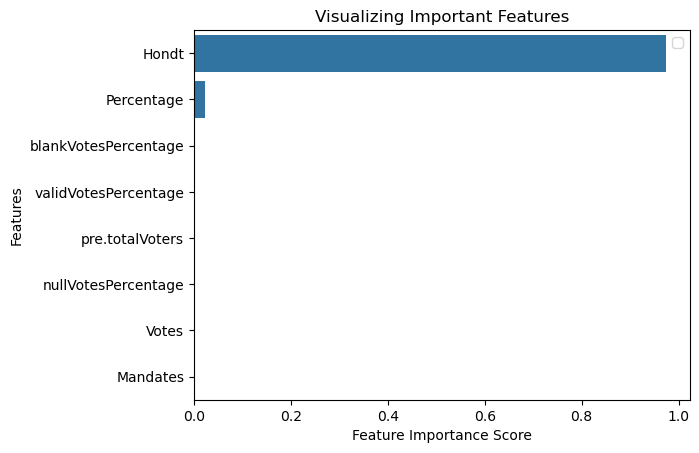

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#In this graph Hondt has the most impact

In [273]:
from sklearn.tree import plot_tree 

In [275]:
from sklearn.ensemble import RandomForestRegressor
clf1=RandomForestRegressor(n_estimators=100) #importing RandomForestRegressor and repeating the same process that we did in decision tree regressor.

In [277]:
clf1.fit(x1_train,y1_train)

RandomForestRegressor()

In [278]:
y_pred2=clf1.predict(x1_test)

In [279]:
y_pred2

array([-0.1638618 , -0.1638618 , -0.01835403, ..., -0.1638618 ,
       -0.1638618 , -0.1638618 ])

In [280]:
y1_test

7436    -0.163862
16193   -0.163862
18024   -0.018354
7834    -0.163862
17489   -0.163862
           ...   
20633   -0.163862
11619   -0.163862
1076    -0.163862
355     -0.163862
19749   -0.163862
Name: FinalMandates, Length: 4329, dtype: float64

In [281]:
mean_absolute_error(y1_test, y_pred2)

0.0012977051690564122

In [282]:
mean_squared_error(y1_test, y_pred2)

0.00015566966277625902

In [283]:
print(clf1.feature_importances_)

[1.07849299e-03 1.10199125e-04 4.56592893e-04 5.05174276e-06
 7.82915941e-03 8.71578645e-03 1.76110124e-04 9.81628607e-01]


In [284]:
from sklearn import tree #Importing the Tree for creating and visualizing random forest.

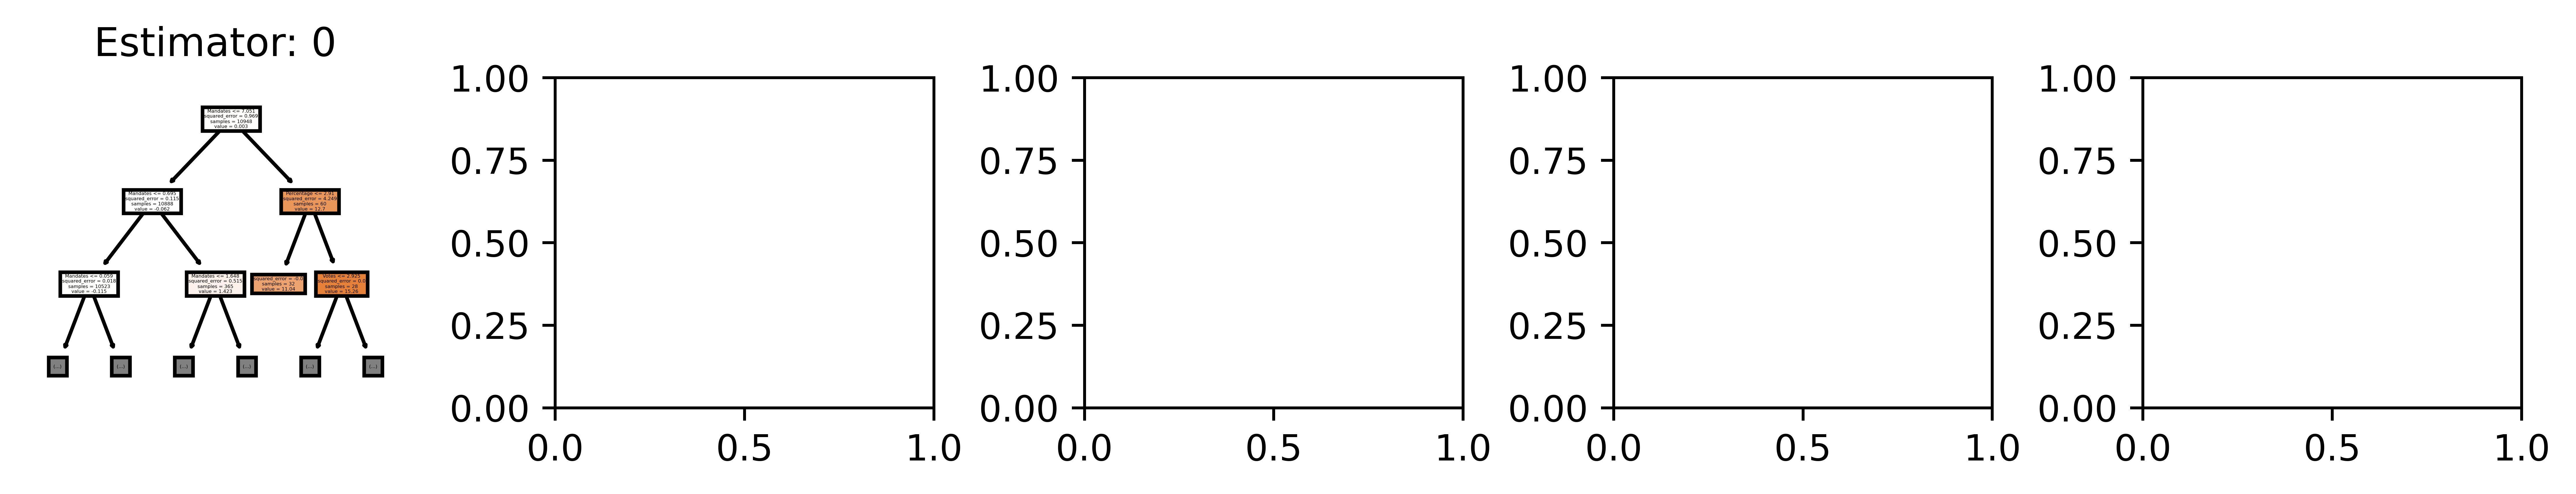

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [285]:
#Creates a figure with one subplot.
#Sets the figure size to 10/2 inches.
#Sets the dots per Inch (DPI) to 900 for higher resolution.
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=2,
                   feature_names = ['Hondt','validVotesPercentage','blankVotesPercentage','Votes','Percentage','nullVotesPercentage', 'pre.totalVoters','Mandates'], 
                   class_names=["0","1","2","3","4","5","6","7","8","9","12","15","17","19","20","77","106"],
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    plt.tight_layout()
    plt.show()

In [ ]:
#We were able to plot only one Decision tree from the randomforest model.
#It essentially becomes a single decision tree model, losing the key benefits of the ensemble approach. 
#With only one tree, the model may not generalize well, is more prone to overfitting, and lacks the stability and improved performance provided by the ensemble method.

In [286]:
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
#imports KNeighborsRegressor for performing regression using the k-nearest neighbors algorithm, which predicts target values by averaging the outcomes of the k closest training samples. 

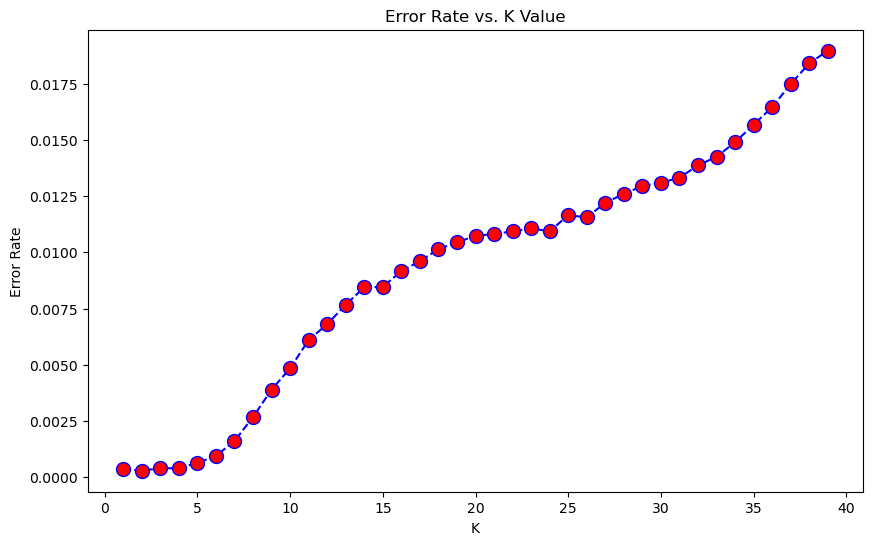

Minimum error:- 0.0002885604543254679 at K = 2


In [287]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(x1_train,y1_train)
 pred_i = knn.predict(x1_test)
 error_rate.append(mean_squared_error(y1_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
#The optimal K value appears to be in the lower range, potentially around 1 to 10, where the error rate is minimal.

In [288]:
knn.fit(x1_train, y1_train)

KNeighborsRegressor(n_neighbors=39)

In [297]:
df1.head()

,blankVotesPercentage,nullVotesPercentage,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt
0,-0.152941,2.3,0.078796,-0.127891,3.210250,3.217832,1.419284,14.757327
1,-0.152941,2.3,0.078796,-0.127891,2.727578,2.733495,1.211248,12.691673
2,-0.152941,2.3,0.078796,-0.127891,0.177415,0.178549,0.112293,2.363404
3,-0.152941,2.3,0.078796,-0.127891,-0.006598,-0.006179,0.032984,1.727818
4,-0.152941,2.3,0.078796,-0.127891,-0.036464,-0.034669,0.020460,1.568922


In [298]:
y_pred4 = knn.predict(x1_test)

In [299]:
y_pred4

array([-0.1638618 , -0.1638618 , -0.08924243, ..., -0.1638618 ,
       -0.1638618 , -0.1638618 ])

In [302]:
y1_test

7436    -0.163862
16193   -0.163862
18024   -0.018354
7834    -0.163862
17489   -0.163862
           ...   
20633   -0.163862
11619   -0.163862
1076    -0.163862
355     -0.163862
19749   -0.163862
Name: FinalMandates, Length: 4329, dtype: float64

In [303]:
mean_absolute_error(y1_test, y_pred4)

0.020558679479241174

In [304]:
mean_squared_error(y1_test, y_pred4)

0.018963585061627222

In [305]:
!pip install xgboost

In [306]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
#importing GradientBoostingRegressor from sklearn.ensemble and XGBRegressor from xgboost, indicating a focus on advanced boosting methods for regression.

In [307]:
XGB = XGBRegressor(random_state=25)

In [308]:
XGB.fit(x1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=25, ...)

In [309]:
y_pred3= XGB.predict(x1_test)

In [310]:
y_pred3

array([-0.16386025, -0.16403863, -0.0184637 , ..., -0.16423772,
       -0.163114  , -0.16389067], dtype=float32)

In [311]:
y1_test

7436    -0.163862
16193   -0.163862
18024   -0.018354
7834    -0.163862
17489   -0.163862
           ...   
20633   -0.163862
11619   -0.163862
1076    -0.163862
355     -0.163862
19749   -0.163862
Name: FinalMandates, Length: 4329, dtype: float64

In [315]:
mean_absolute_error(y1_test, y_pred3)

0.0019451013582592253

In [321]:
mean_squared_error(y1_test, y_pred3)

0.0003428357545236465

In [322]:
estimators = []
estimators.append(("Decision Tree", DecisionTreeRegressor()))
estimators.append(("Random Forest", RandomForestRegressor()))
estimators.append(("XGB", XGBRegressor()))
estimators.append(("KNearest Neighbours", KNeighborsRegressor()))

In [323]:
from sklearn.ensemble import StackingRegressor
SR = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
SR.fit(x1_train, y1_train)
y_pred5 = SR.predict(x1_test)

from sklearn.metrics import mean_squared_error

print(f"\nStacking Regressor training mean_squared_error: {mean_squared_error(y1_train, SR.predict(x1_train)):0.2f}")
print(f"Stacking Regressor test mean_squared_error: {mean_squared_error(y1_test, y_pred5):0.2f}")
print(f"Stacking Regressor test R^2 score: {SR.score(x1_test, y1_test):0.2f}")


Stacking Regressor training mean_squared_error: 0.00
Stacking Regressor test mean_squared_error: 0.00
Stacking Regressor test R^2 score: 1.00


In [ ]:
#StackingRegressor from sklearn.ensemble to combine multiple regression models into a single, more robust model. 
#By fitting the StackingRegressor with a set of base estimators and a RandomForestRegressor as the final estimator, 
#it leverages the strengths of various models and aggregates their predictions to improve accuracy.

In [324]:
SR.score(x1_train, y1_train)

0.9999801292908774

In [325]:
new_data = pd.read_csv("D://Machine learning//Group assignment//New Data.csv") #importing new data

In [ ]:
#Evaluating a machine learning model on new data after training is essential to ensure it generalizes well to unseen scenarios, 
#rather than just memorizing the training data.

In [326]:
new_data

,blankVotesPercentage,nullVotesPercentage,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt
0,2.50,2.30,428546,0,0.66,0.70,2567,1
1,2.54,1.74,5380451,5,4.25,4.44,216448,10


In [327]:
dt1.predict(new_data)

array([ 0.85469261, 15.25996213])

In [328]:
clf1.predict(new_data)

array([ 0.74265162, 13.9940445 ])

In [329]:
XGB.predict(new_data)

array([0.65512764, 2.2739358 ], dtype=float32)

In [330]:
knn.predict(new_data)

array([ 5.5631749 , 11.23051611])

In [334]:
SR.predict(new_data)

array([ 4.16499444, 13.9940445 ])

# Conclusion:
Despite the RandomForestRegressor having the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE) values among the models the results suggest that it may not be the most appropriate model for this specific task. A closer examination of the errors reveals that while RandomForestRegressor shows minimal errors, it could be overfitting the data leading to overly optimistic error metrics that might not generalize well to unseen data.

The XGBRegressor presents a more balanced performance with slightly higher MAE and MSE values compared to RandomForestRegressor, but it likely provides a more generalizable and robust prediction. The KNNRegressor, with its significantly higher error metrics, is the least accurate and reliable model for this task. Given this context, the XGBRegressor is likely the better choice overall, offering a compromise between accuracy and generalization. It avoids the potential overfitting seen with RandomForestRegressor, making it a more dependable model for predicting the final number of mandates.